In [10]:
%matplotlib inline
from __future__ import print_function

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

from utils.data_utils import *
from utils.training_utils import *
clavius = '/Users/thorey/Documents/project/competition/fognet/models/clavius'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


# Iterators

In [20]:
models = [os.path.join(clavius,'lstm','model_0',f) for f in os.listdir(os.path.join(clavius,'lstm','model_0')) if f not in ['conf_model.json']]

In [113]:
def gather_data(model):
    config = parse_conf_file(os.path.join(model,'conf_model.json'))
    try:
        submission = [f for f in os.listdir(model) if f.split('_')[0] == 'submissions'][0]
        score = [f for f in os.listdir(model) if f.split('_')[0] == 'train'][0]
    except:
        submission = 'Processing'
        score = 'train_10_val_10'
    
    data = {'root': model,
            'name':model.split('/')[-1] ,
           'submission':submission,
           'trainacc':float(score.split('_')[1]),
           'valacc':float(score.split('_')[3]),
           'lr': config['lr'],
           'hiddens':config['hiddens'],
           'reg':config['reg']}
    return data
    
results = pd.DataFrame.from_dict(list(gather_data(f) for f in models))

In [116]:
results.sort_values('valacc').iloc[:20]

,hiddens,lr,name,reg,root,submission,trainacc,valacc
221,60,0.027826,h_60_rg_0.001_lr_0.0278255940221,1.000000e-03,/Users/thorey/Documents/project/competition/fo...,submissions_20160324_095858.csv,4.086,3.615
22,10,0.004642,h_10_rg_0.001_lr_0.00464158883361,1.000000e-03,/Users/thorey/Documents/project/competition/fo...,submissions_20160323_204746.csv,2.221,3.895
63,10,0.027826,h_10_rg_2.78255940221e-07_lr_0.0278255940221,2.782559e-07,/Users/thorey/Documents/project/competition/fo...,submissions_20160323_204614.csv,4.364,3.919
83,10,0.027826,h_10_rg_5.99484250319e-06_lr_0.0278255940221,5.994843e-06,/Users/thorey/Documents/project/competition/fo...,submissions_20160323_204759.csv,3.499,3.924
23,10,0.027826,h_10_rg_0.001_lr_0.0278255940221,1.000000e-03,/Users/thorey/Documents/project/competition/fo...,submissions_20160323_205029.csv,3.953,3.926
13,10,0.027826,h_10_rg_0.00035938136638_lr_0.0278255940221,3.593814e-04,/Users/thorey/Documents/project/competition/fo...,submissions_20160323_204941.csv,4.085,3.936
249,60,0.027826,h_60_rg_2.15443469003e-06_lr_0.0278255940221,2.154435e-06,/Users/thorey/Documents/project/competition/fo...,submissions_20160324_095033.csv,3.701,4.042
287,60,0.027826,h_60_rg_7.74263682681e-07_lr_0.0278255940221,7.742637e-07,/Users/thorey/Documents/project/competition/fo...,submissions_20160324_095053.csv,3.601,4.046
73,10,0.027826,h_10_rg_4.64158883361e-05_lr_0.0278255940221,4.641589e-05,/Users/thorey/Documents/project/competition/fo...,submissions_20160323_204829.csv,4.443,4.097
133,35,0.027826,h_35_rg_1.6681005372e-05_lr_0.0278255940221,1.668101e-05,/Users/thorey/Documents/project/competition/fo...,submissions_20160324_013958.csv,3.352,4.132


In [167]:
df = results.sort_values('valacc').head(10)
df.index = range(len(df))
for i,row in df.iterrows():
    if i == 0:
        submission = pd.read_csv(os.path.join(row.root,row.submission),index_col=0)
    else:
        submission = submission.join(pd.read_csv(os.path.join(row.root,row.submission),index_col=0),how='left',rsuffix='r')
final_sub = pd.DataFrame(np.array(submission).mean(axis=1),index=submission.index,columns = ['yield'])

In [169]:
final_sub.to_csv('model_ensemble.csv')

In [177]:
final_sub.index

Index([u'2013-11-24 00:00:00', u'2013-11-24 02:00:00', u'2013-11-24 04:00:00',
       u'2013-11-24 06:00:00', u'2013-11-24 08:00:00', u'2013-11-24 10:00:00',
       u'2013-11-24 12:00:00', u'2013-11-24 14:00:00', u'2013-11-24 16:00:00',
       u'2013-11-24 18:00:00',
       ...
       u'2016-01-03 16:00:00', u'2016-01-03 18:00:00', u'2016-01-03 20:00:00',
       u'2016-01-03 22:00:00', u'2016-01-04 00:00:00', u'2016-01-04 02:00:00',
       u'2016-01-04 04:00:00', u'2016-01-04 06:00:00', u'2016-01-04 08:00:00',
       u'2016-01-04 10:00:00'],
      dtype='object', length=1590)

In [ ]:
plt.scatter(submission_format.index,hello['yield'])

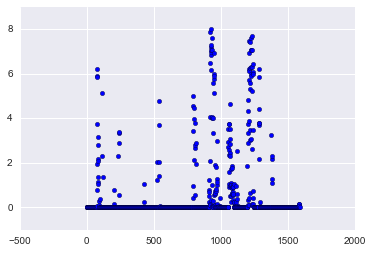

In [179]:
plt.scatter(range(len(final_sub.index)),final_sub['yield'])